In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# open a root file and make an array of all TH1F within a TList
file = uproot.open("../sexaquark/test/AnalysisResults_kalmanV0s.root")
histograms = file["Hists/"]

# map names to histograms
hist_dict = {hist.name: hist for hist in histograms}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [247]:
def plot(stage_name, particle_name, var_name):

    plt.figure(figsize=(16,4))

    # part 1: all histograms overlayed
    plt.subplot(1,4,1)
    var_hists = [f"{stage_name}_All_{particle_name}_{var_name}", f"{stage_name}_True_{particle_name}_{var_name}", f"{stage_name}_Signal_{particle_name}_{var_name}"]

    max_y=0

    for hist_name, color in zip(var_hists, colors):
        values, edges = hist_dict[hist_name].to_numpy()
        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=color, label=hist_name)
        if np.max(values) > max_y:
            max_y = np.max(values)

    plt.ylim(top=1.2*max_y)
    plt.legend(fontsize='small')

    # part 2: one plot per histogram
    for i, hist_name, color in zip(range(1,4), var_hists, colors):
        values, edges = hist_dict[hist_name].to_numpy()
        plt.subplot(1,4,i+1)

        avg = np.average(edges[:-1], weights=values)
        n_entries = np.sum(values)
        first_bin = np.where(values > 0)[0][0]
        last_bin = np.where(values > 0)[0][-1]
        stats = f"Entries: {n_entries:.0f}\nAverage: {avg:.2f}\nMin. {var_name}: {edges[first_bin]:.2f}\nMax. {var_name}: {edges[last_bin+1]:.2f}"

        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=color, label=hist_name)
        plt.hist(edges[:-1], edges, alpha=0., label=stats) # invisible histogram to show stats on the legend

        plt.ylim(top=1.2*np.max(values))

        plt.legend(fontsize='small')

    plt.tight_layout()

    plt.show()

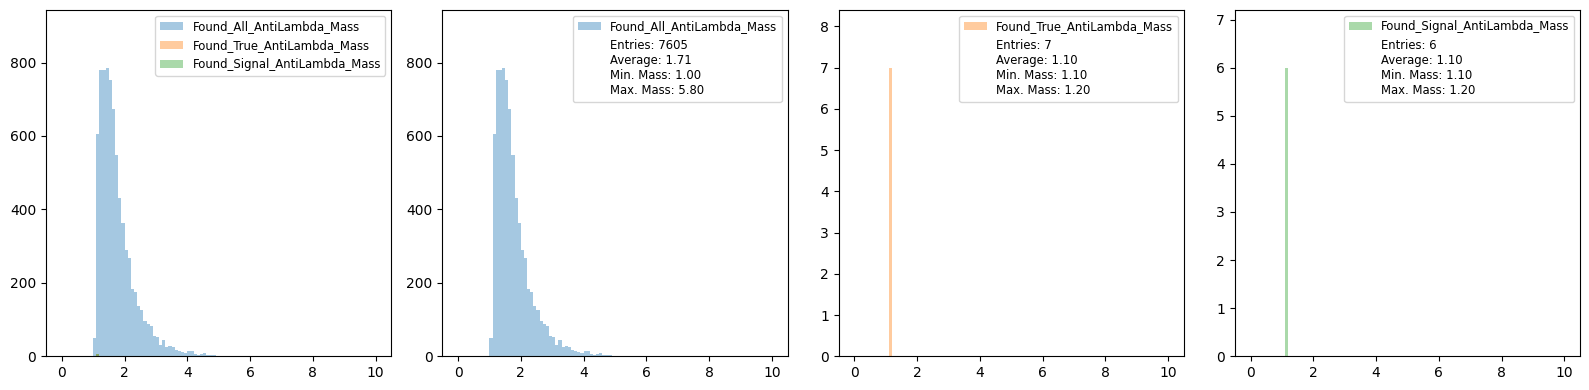

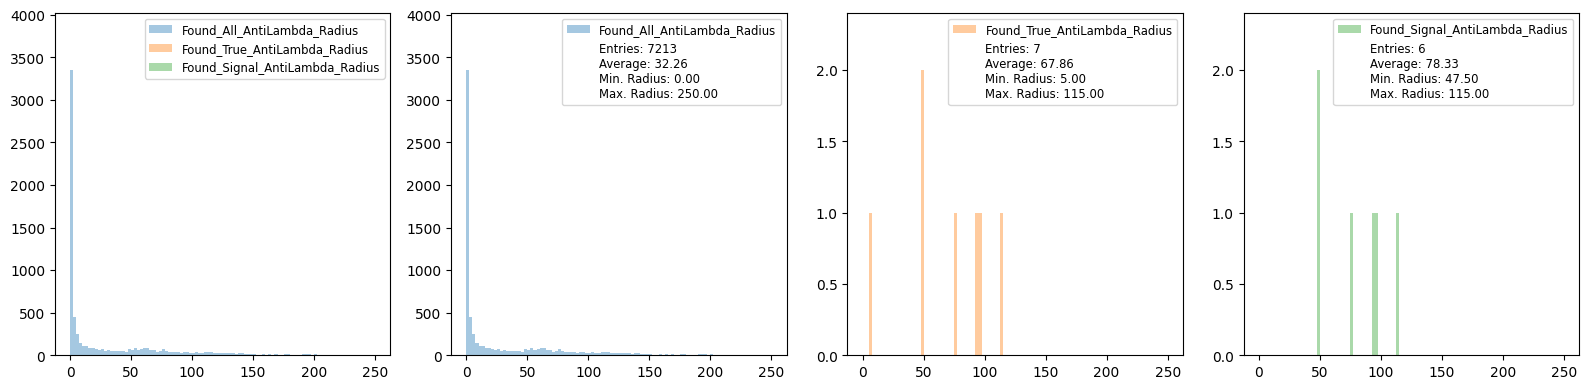

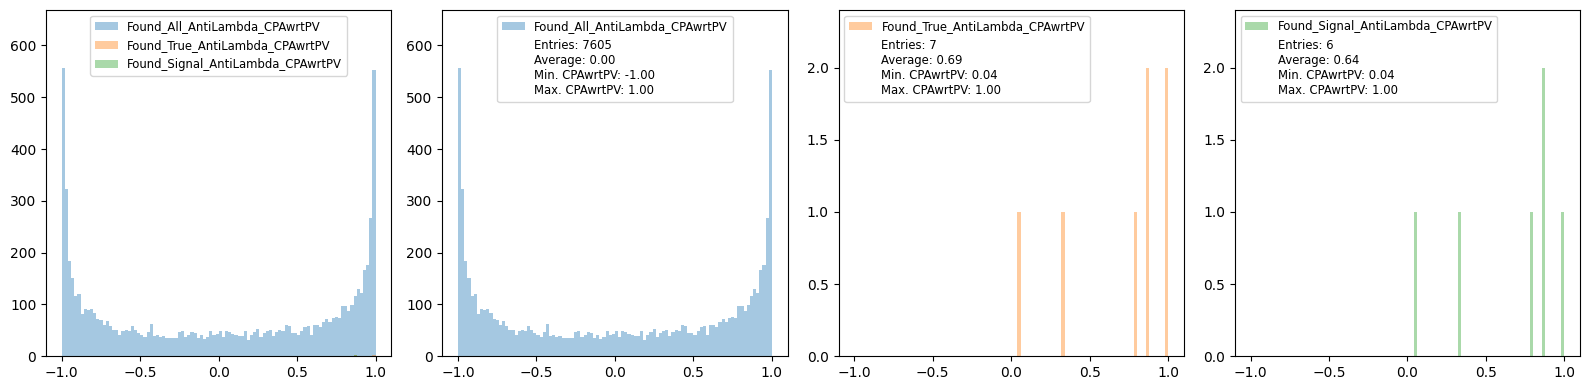

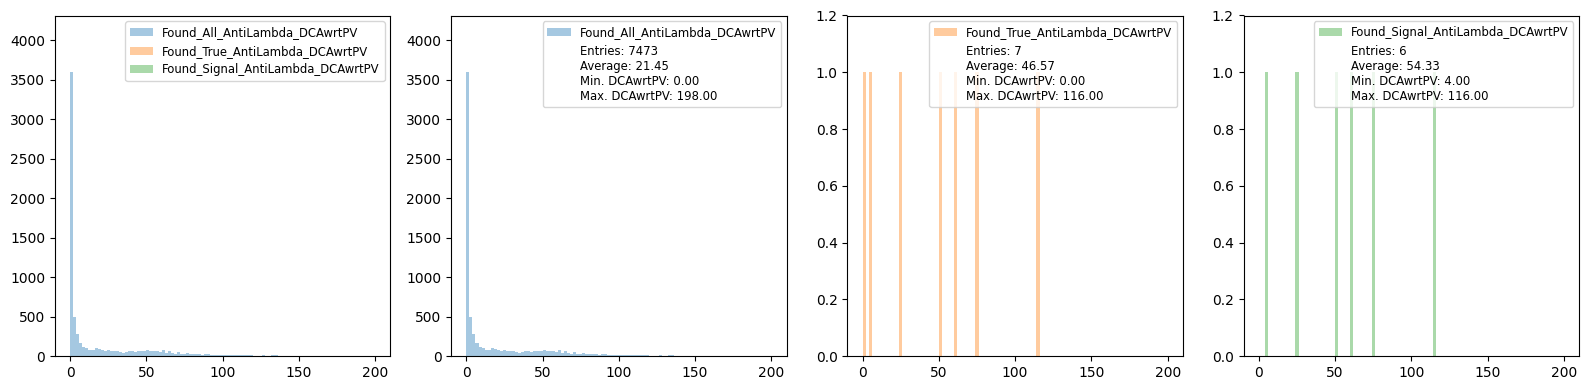

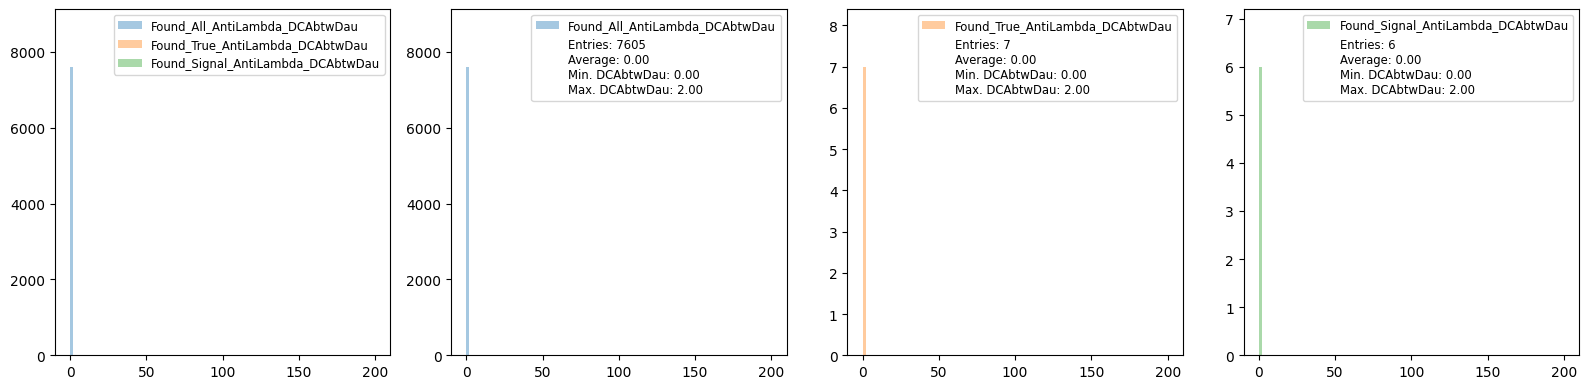

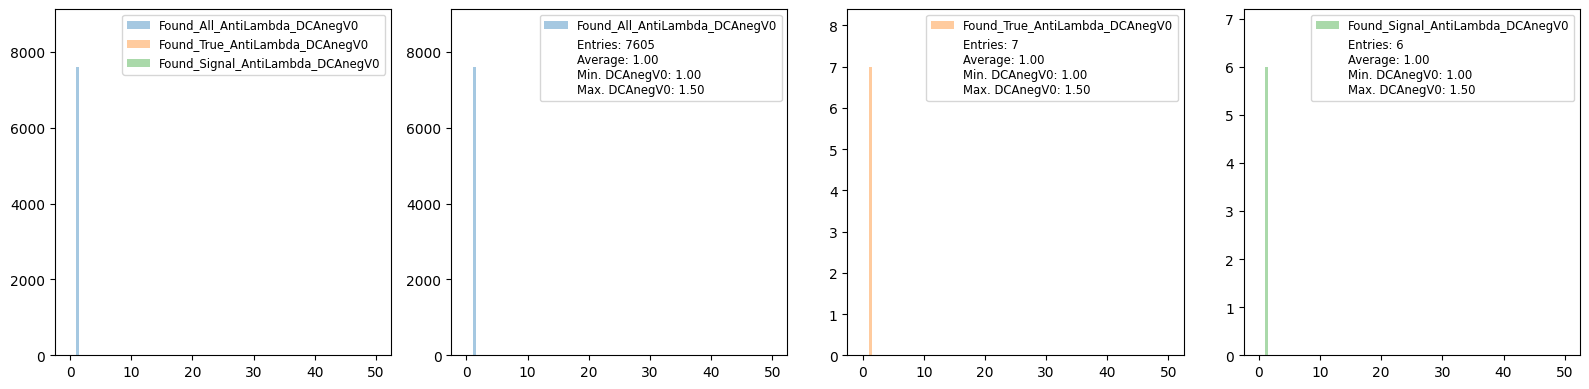

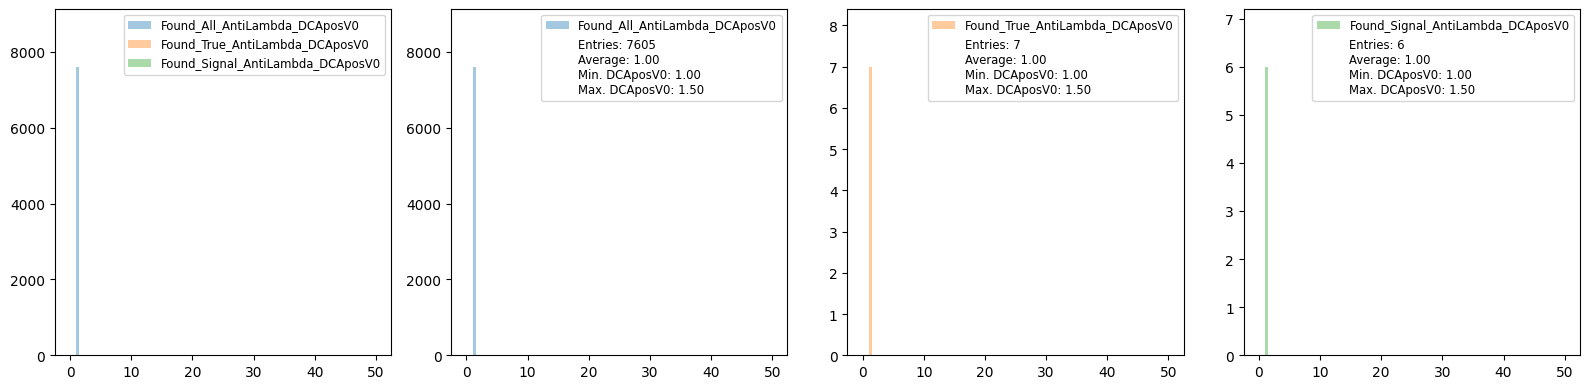

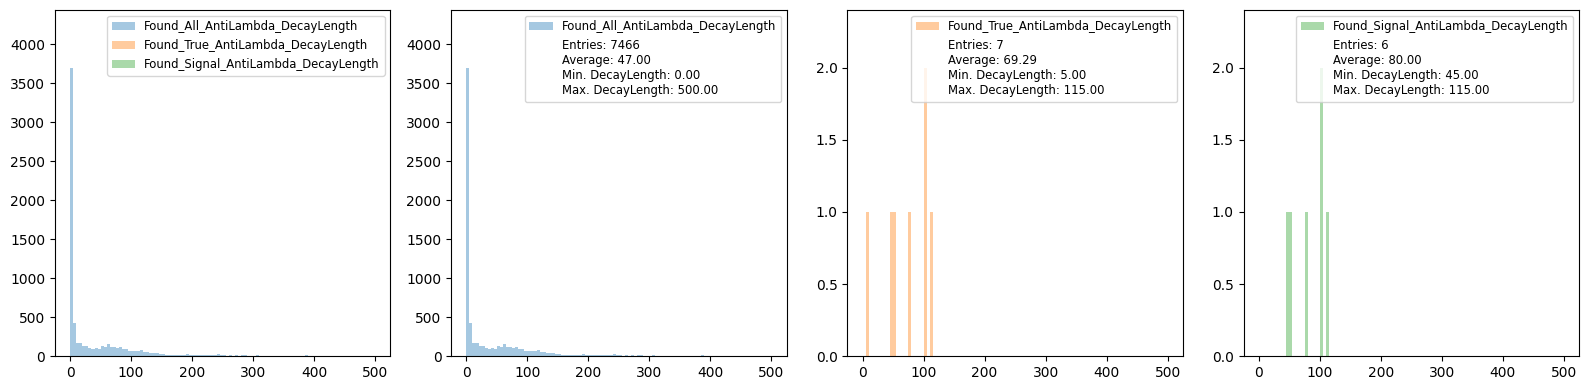

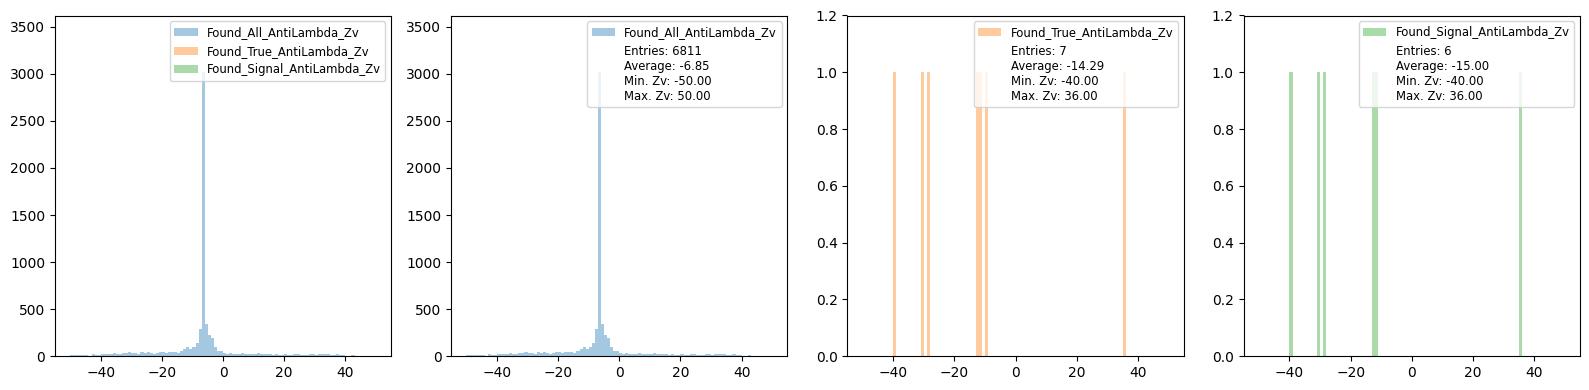

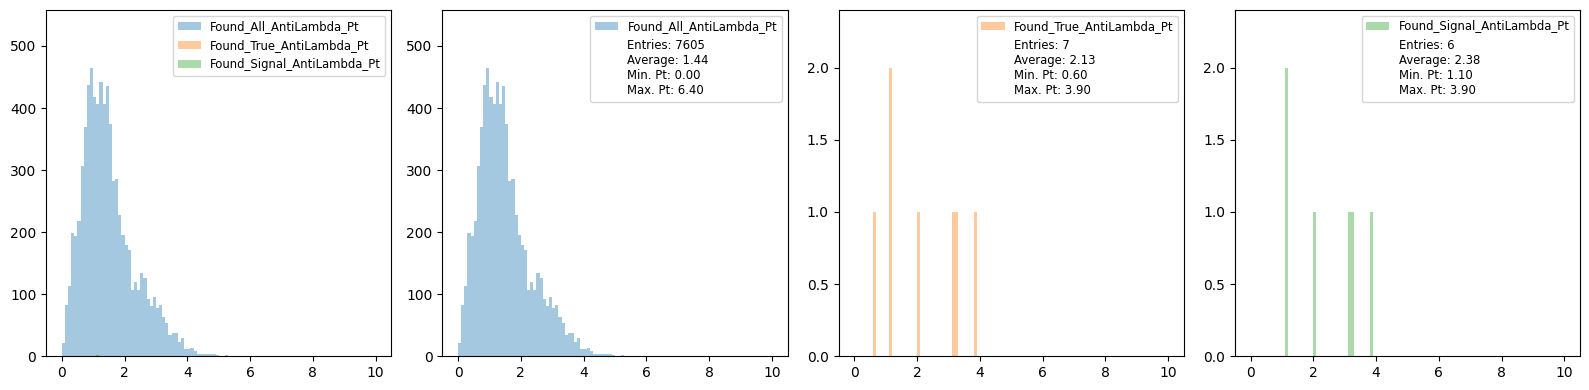

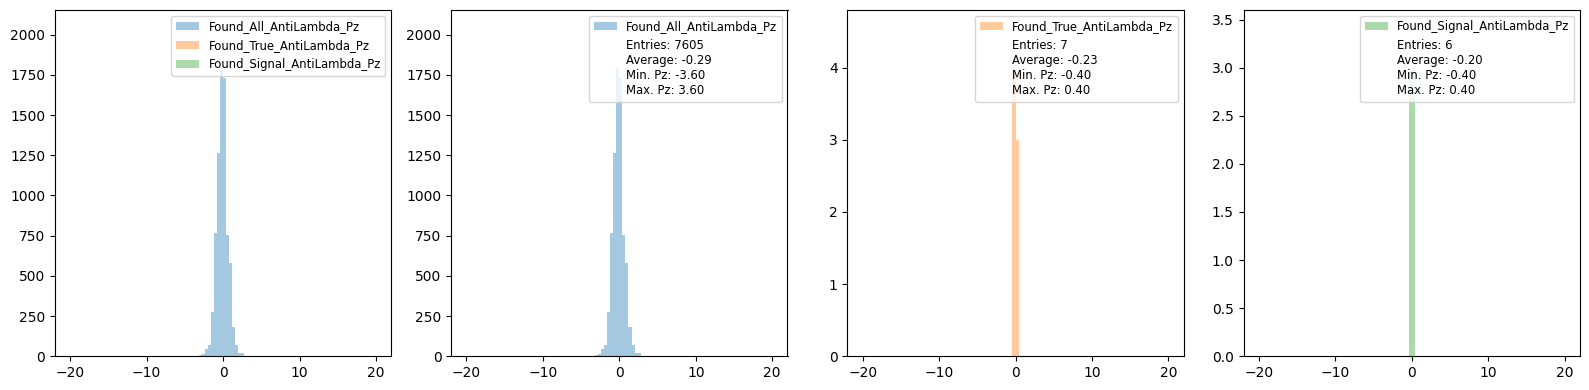

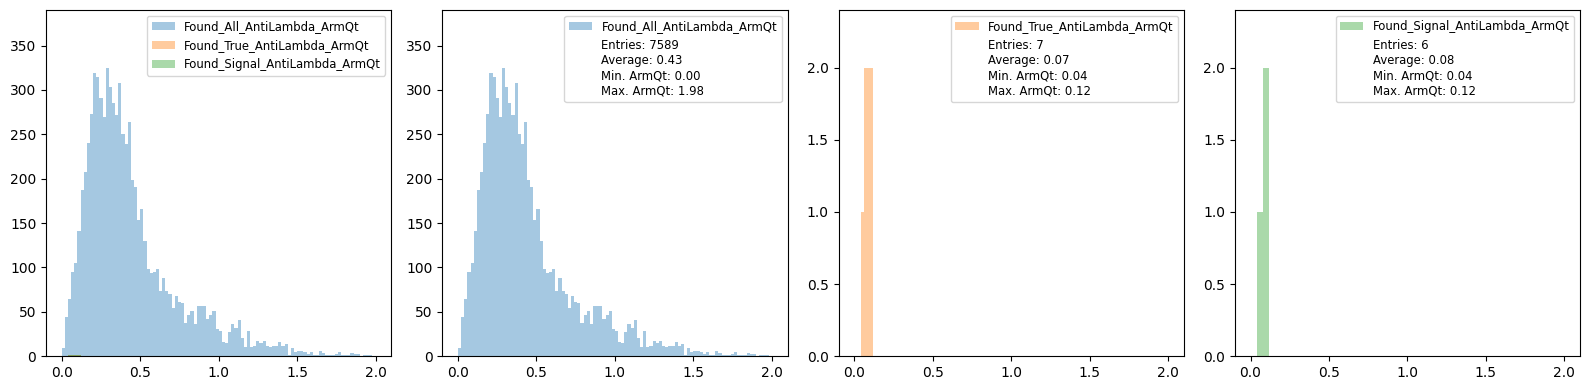

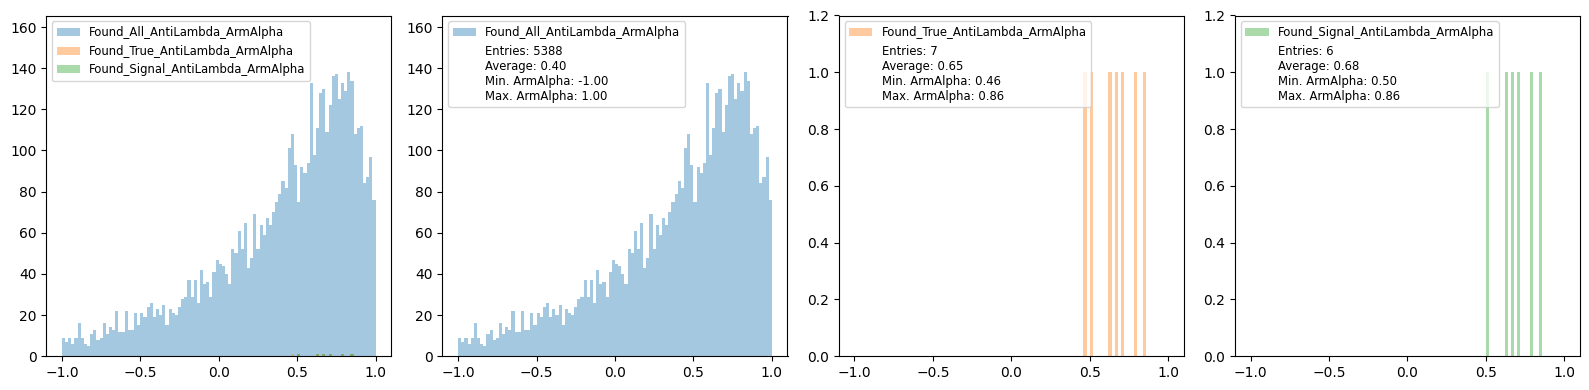

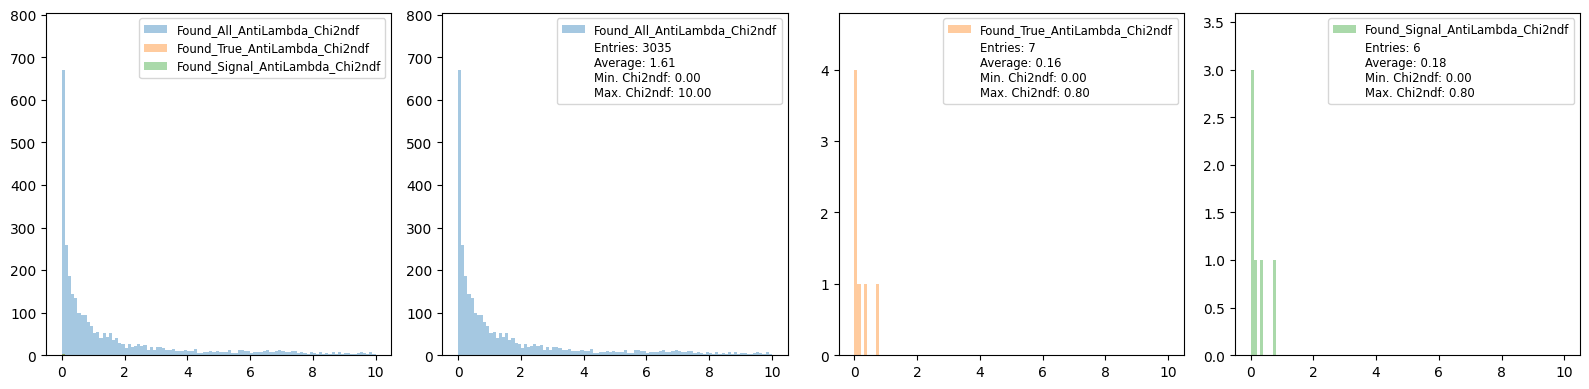

In [248]:
plot("Found", "AntiLambda", "Mass")
plot("Found", "AntiLambda", "Radius")
plot("Found", "AntiLambda", "CPAwrtPV")
plot("Found", "AntiLambda", "DCAwrtPV")
plot("Found", "AntiLambda", "DCAbtwDau")
plot("Found", "AntiLambda", "DCAnegV0")
plot("Found", "AntiLambda", "DCAposV0")
plot("Found", "AntiLambda", "DecayLength")
plot("Found", "AntiLambda", "Zv")
plot("Found", "AntiLambda", "Pt")
plot("Found", "AntiLambda", "Pz")
plot("Found", "AntiLambda", "ArmQt")
plot("Found", "AntiLambda", "ArmAlpha")
plot("Found", "AntiLambda", "Chi2ndf")

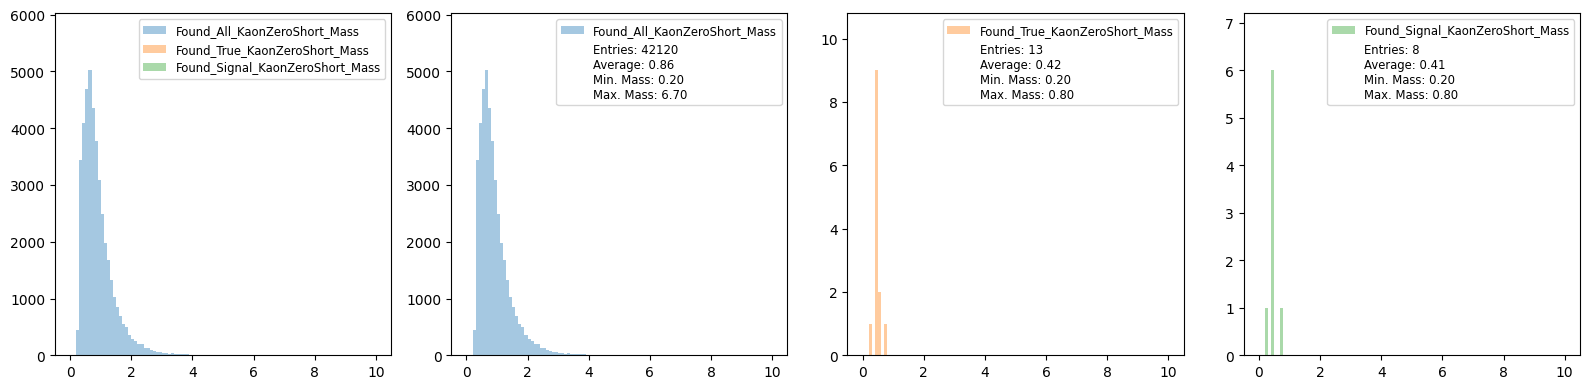

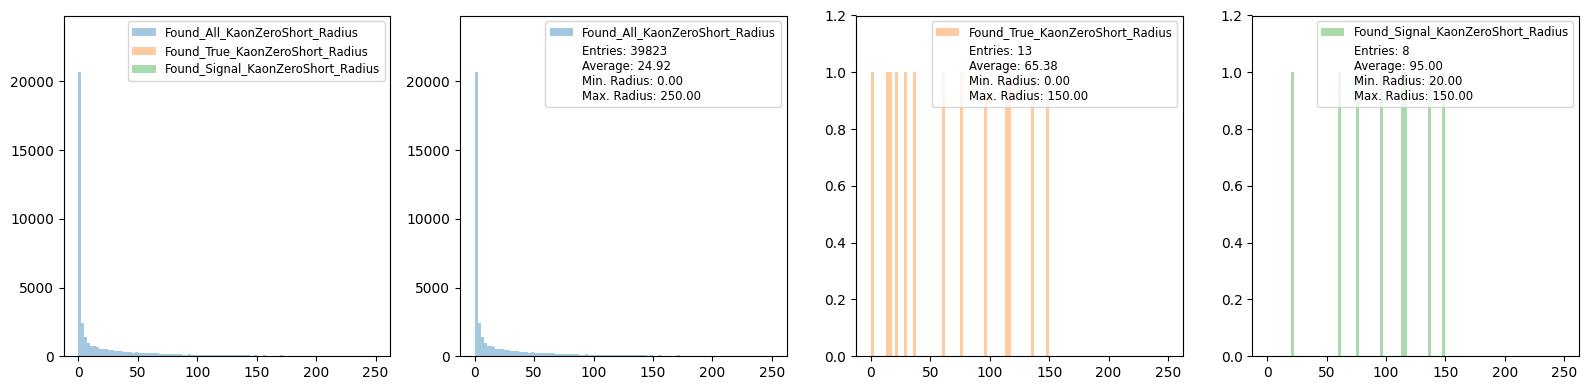

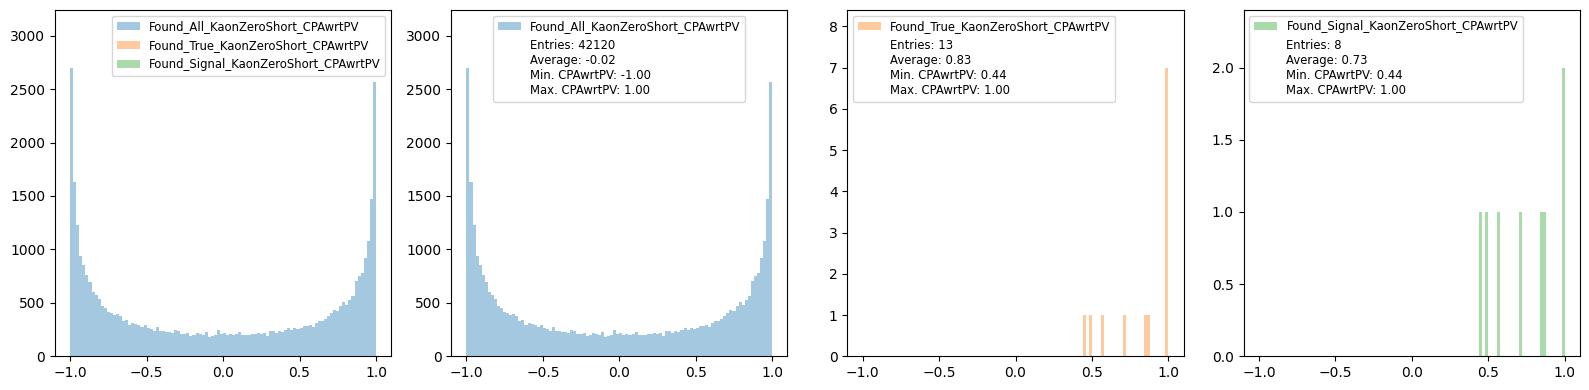

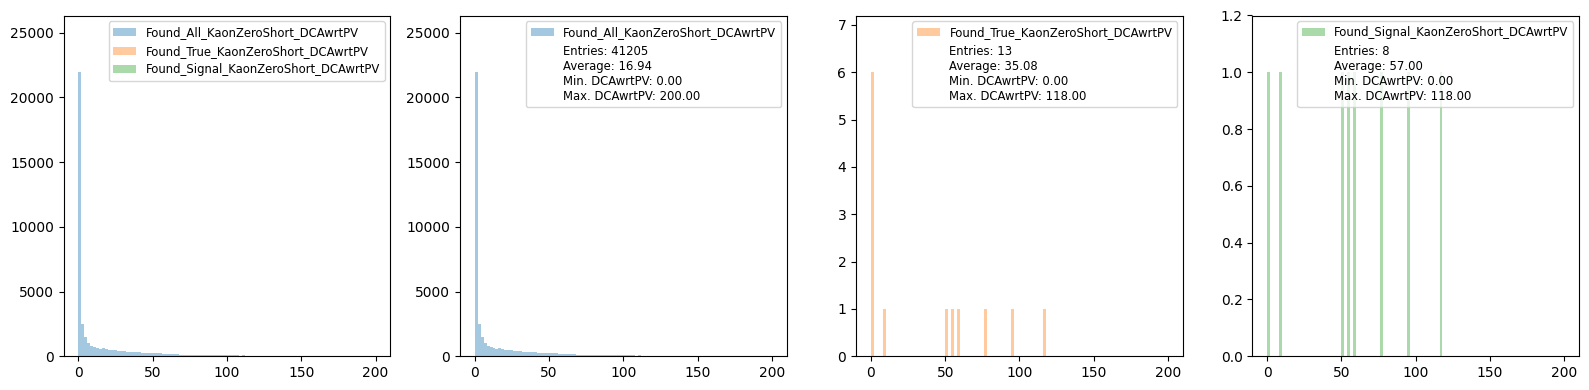

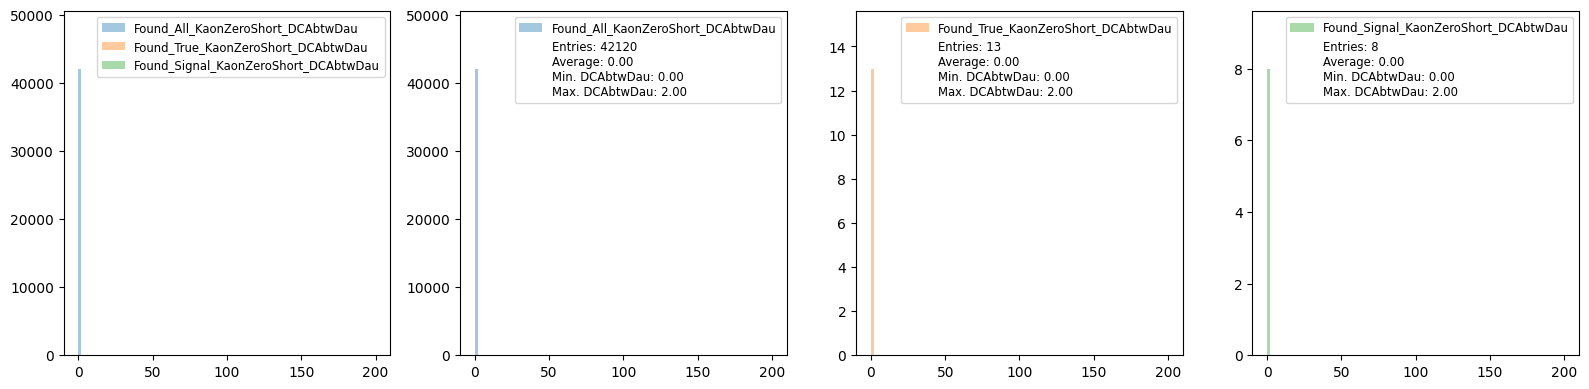

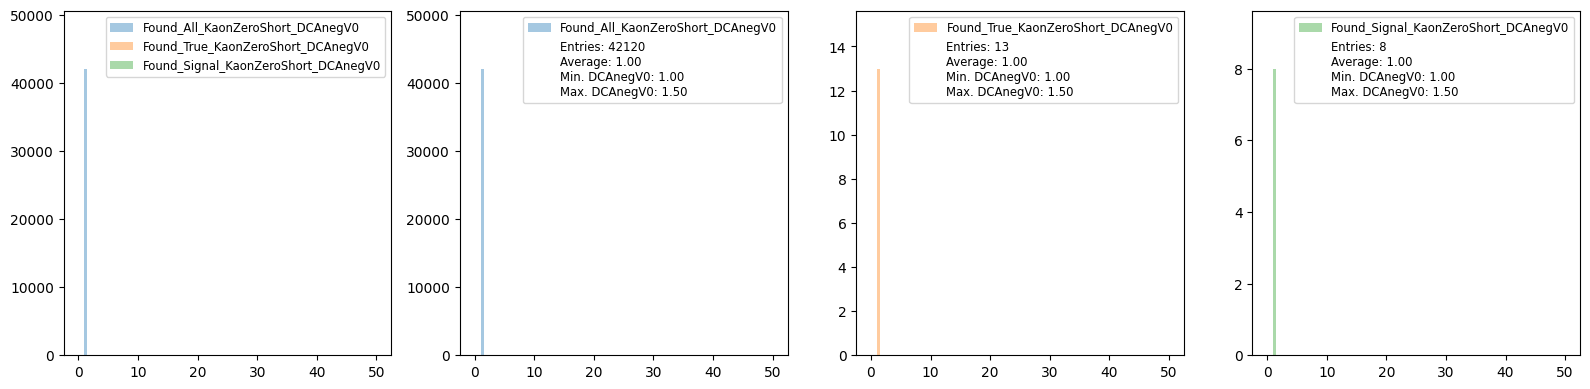

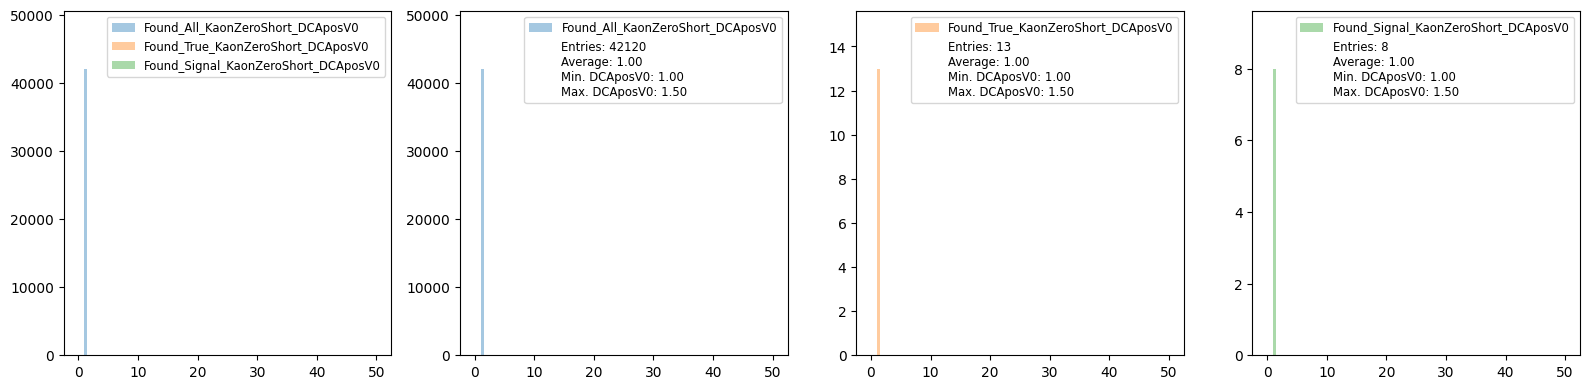

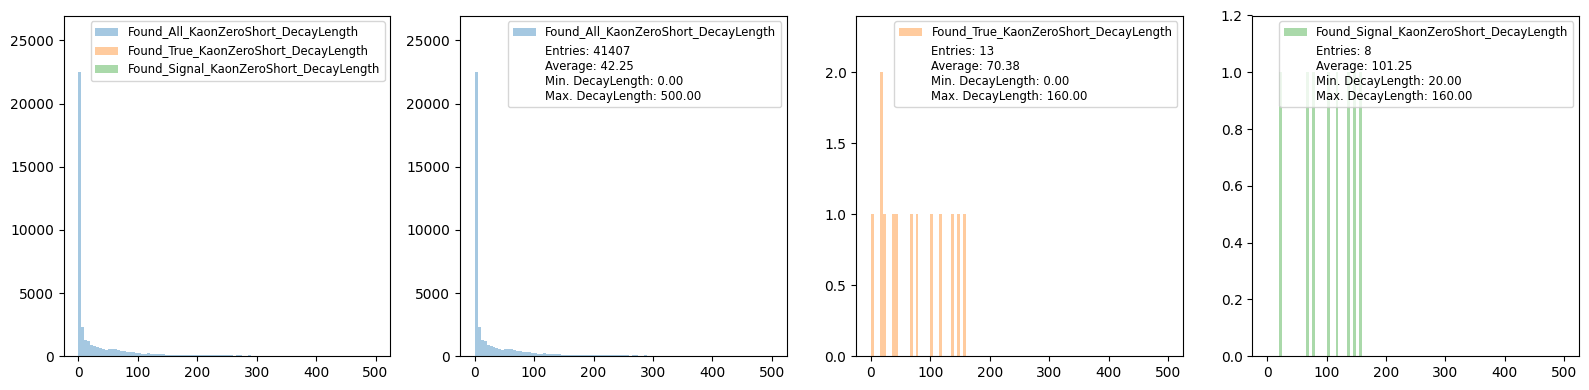

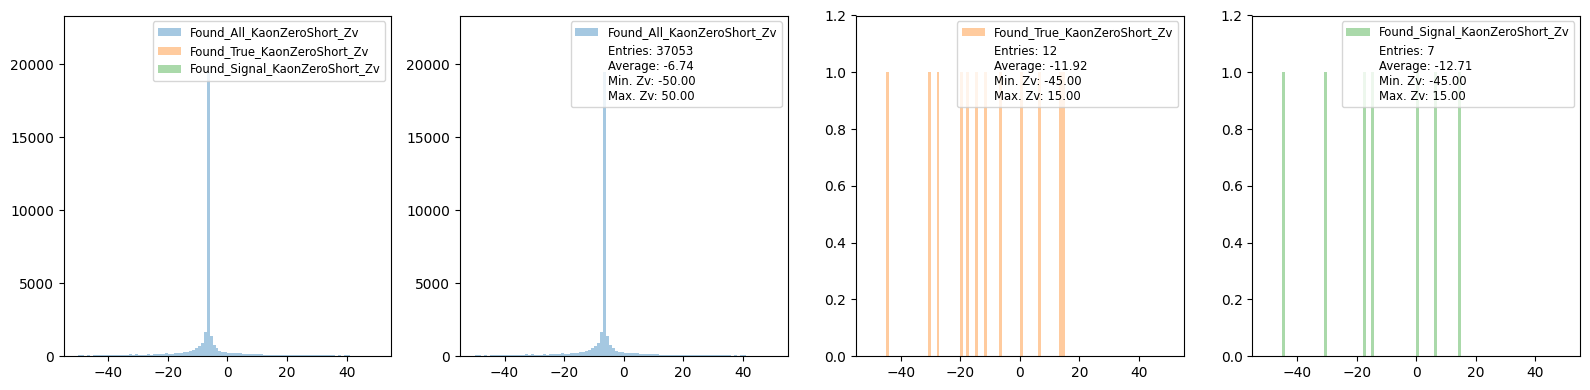

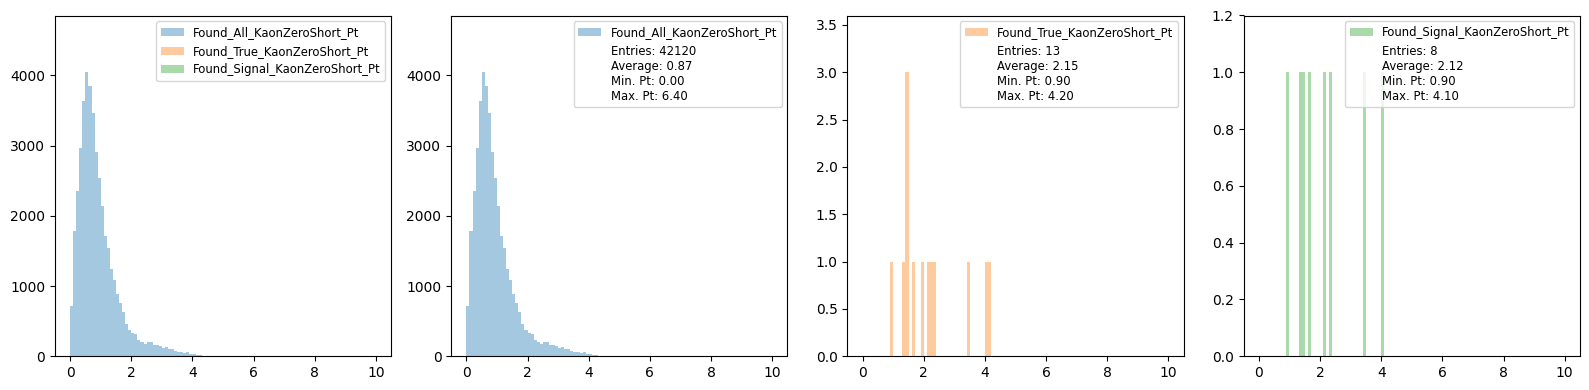

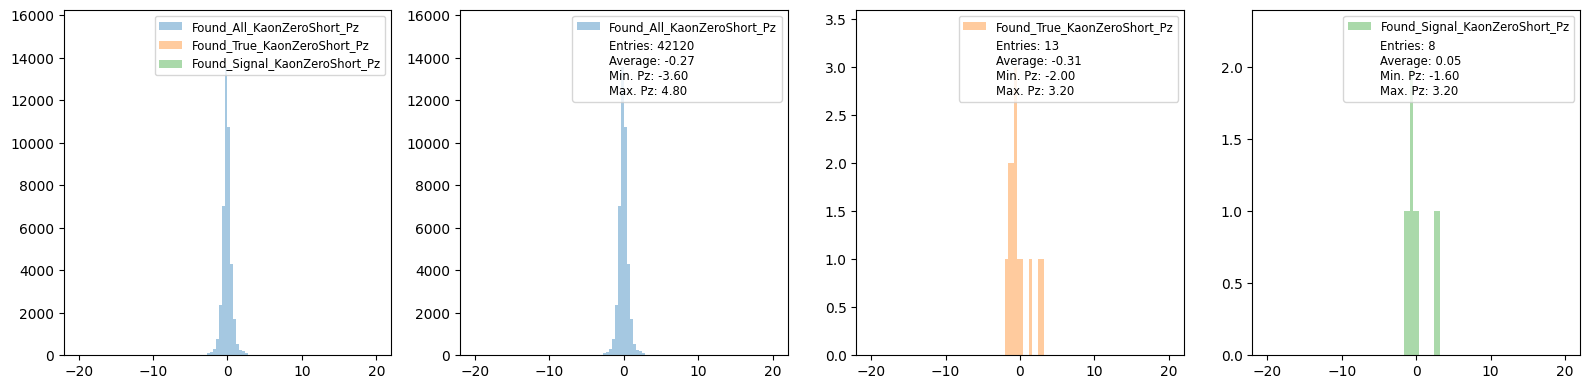

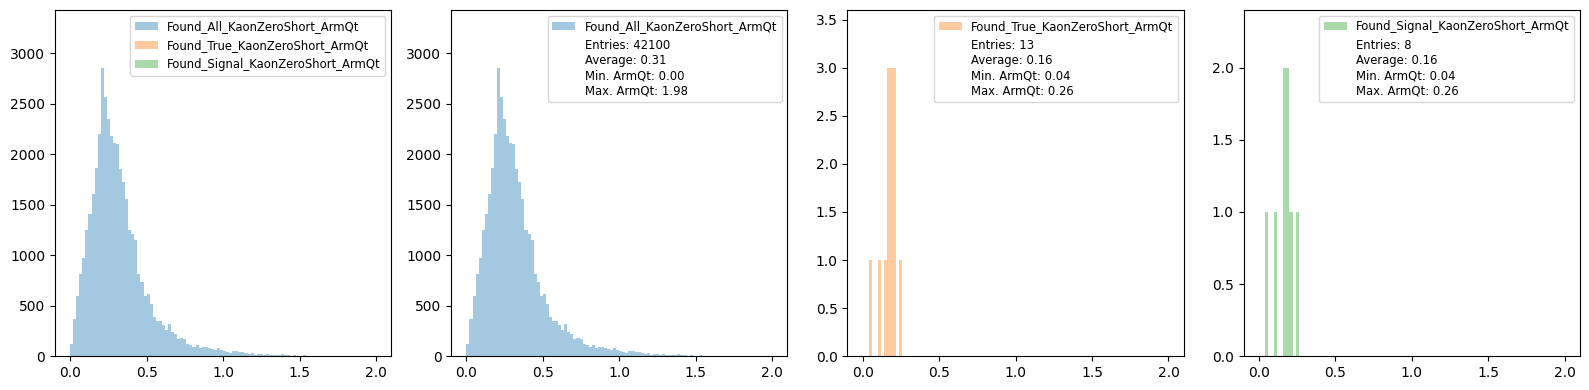

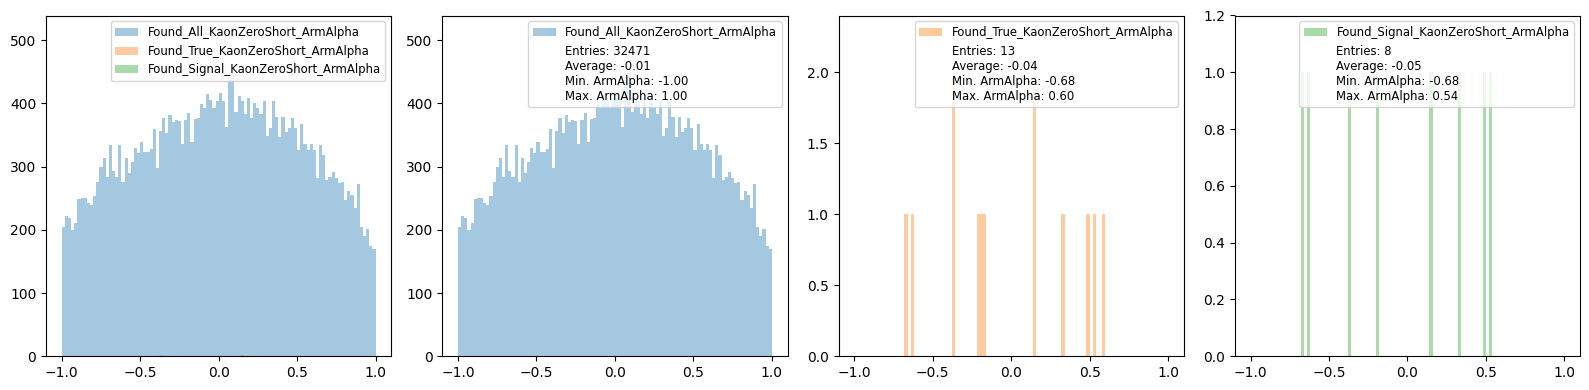

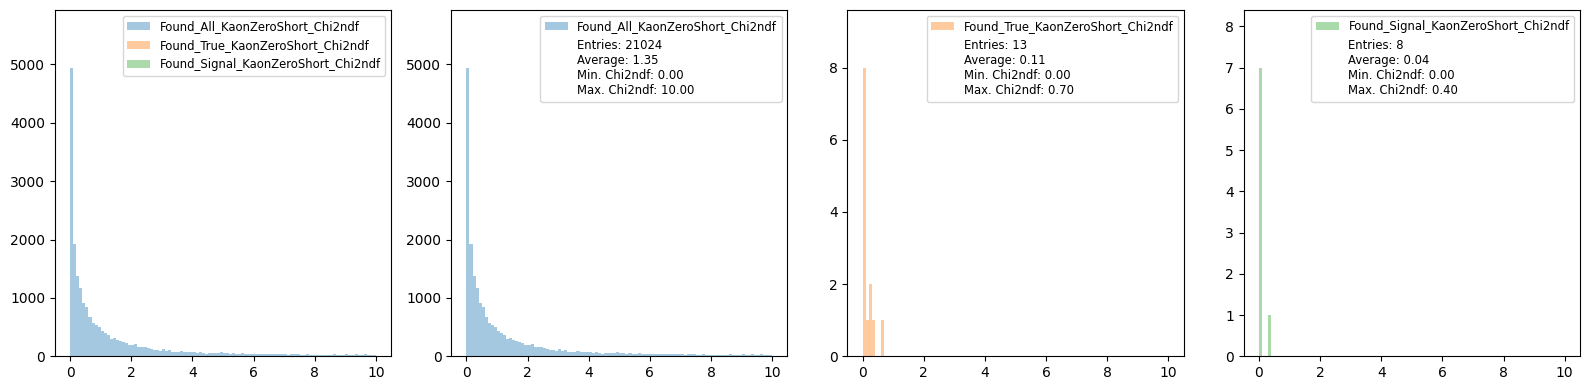

In [249]:
plot("Found", "KaonZeroShort", "Mass")
plot("Found", "KaonZeroShort", "Radius")
plot("Found", "KaonZeroShort", "CPAwrtPV")
plot("Found", "KaonZeroShort", "DCAwrtPV")
plot("Found", "KaonZeroShort", "DCAbtwDau")
plot("Found", "KaonZeroShort", "DCAnegV0")
plot("Found", "KaonZeroShort", "DCAposV0")
plot("Found", "KaonZeroShort", "DecayLength")
plot("Found", "KaonZeroShort", "Zv")
plot("Found", "KaonZeroShort", "Pt")
plot("Found", "KaonZeroShort", "Pz")
plot("Found", "KaonZeroShort", "ArmQt")
plot("Found", "KaonZeroShort", "ArmAlpha")
plot("Found", "KaonZeroShort", "Chi2ndf")